# **Modelo de Regressão - SPC Grafeno**

O objetivo desta Inteligência Artificial é realizar a previsão de quantas das notas criadas em um mês serão canceladas. Visando a empresa entender o porquê disso e achar soluções cabíveis para que o número de notas fiscais canceladas diminua. O modelo utiliza a Floresta Aleatória de Regressão.

O modelo utiliza como variáveis preditórias: Criação da nota fiscal (created_at) e estado (state) da nota fiscal.
O modelo deve prever o total de notas fiscais canceladas.


Para começar a construção do modelo, deve ser realizado as importações das bibliotecas necessárias para o desenvolvimento.

In [2]:
# Pandas
import pandas as pd

# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [50]:
data = pd.read_csv('asset_trade_bills 2.csv', delimiter= ';', low_memory = False)
data.head(5)

,id,due_date,nfe_number,nfe_series,kind,state,payer_id,endorser_original_id,new_due_date,created_at,updated_at,deleted_at,participant_id,ballast_kind,invoice_number,payment_place,update_reason_kind,finished_at
0,b13369ca-e3de-451c-bfa0-2c2c06db00da,05/08/2023,523451,6,services,canceled,fa1370e5-9cc0-49a6-af05-f656d9657235,88c3eea1-9eab-4eaf-a9e8-1eb4a2803175,05/08/2023,2023-07-12 13:38:12.035807,2024-02-09 12:56:01.418036,NaN,a11591f2-4cc7-4ff3-bb27-ad1e25361178,invoice,123123,São Paulo,others,NaN
1,c2f7a256-7165-4787-966e-e094344827d8,23/03/2024,5010,1,goods,canceled,e3d75ba8-42c9-4c99-a74b-d492d55ef4e7,964109cb-d608-444e-944c-a2eae434139a,23/03/2024,2024-02-07 19:34:32.482400,2024-02-09 12:56:26.426682,NaN,a11591f2-4cc7-4ff3-bb27-ad1e25361178,nfe_key,NaN,BA,others,NaN
2,1bedeb72-2413-43ec-95a9-c6b539ce6a99,17/01/2024,38412,1,goods,active,d072845e-b6cd-4842-ae8b-3ec786ab2c29,4cf5cf14-1f9e-4013-8246-2f8933711812,17/01/2024,2023-12-20 13:22:01.359676,2024-02-01 03:01:47.846091,NaN,ad1b3da5-be27-4282-93df-c3bd77acac91,nfe_key,NaN,RN,NaN,NaN
3,ac2d5831-fdd6-44c5-8b07-01faa04dc451,31/07/2023,3932,1,goods,canceled,aa4cf60b-bd06-4386-bf11-d3722f5c6aa4,1b24aaf1-a7a6-4693-867c-2ba88bf17224,31/07/2023,2023-06-29 17:54:29.986491,2023-07-05 20:07:14.565196,NaN,04282b7d-ed52-4bbe-abb8-eea6cc77ba9f,nfe_key,NaN,teste,operational_error,NaN
4,dacc7c5a-accb-430b-8d51-5aceb572e2c4,05/08/2033,910304872,910304872,goods,canceled,0140a25d-625f-4431-9248-94d58419d8cd,107221ca-f7ab-464b-85c3-a19e56d4f84b,05/08/2033,2024-02-07 18:56:32.249501,2024-02-09 12:56:50.403976,NaN,a11591f2-4cc7-4ff3-bb27-ad1e25361178,nfe_key,NaN,São Paulo,others,NaN


Observando valores nulos de cada coluna do dataset:

In [14]:
print(data.isnull().sum())

id                           0
due_date                     1
nfe_number                 692
nfe_series                 885
kind                         1
state                        1
payer_id                     1
endorser_original_id         1
new_due_date                 1
created_at                   1
updated_at                   1
deleted_at              164751
participant_id              11
ballast_kind                 1
invoice_number          165270
payment_place                1
update_reason_kind      122973
finished_at             165847
dtype: int64


Observando a quantidade de registros no dataset:

In [13]:
print('Registros:'+ str(len(data)))

Registros:166389


Observando o tipo de dado de cada coluna do dataset:

In [15]:
print(data.dtypes)

id                      object
due_date                object
nfe_number              object
nfe_series              object
kind                    object
state                   object
payer_id                object
endorser_original_id    object
new_due_date            object
created_at              object
updated_at              object
deleted_at              object
participant_id          object
ballast_kind            object
invoice_number          object
payment_place           object
update_reason_kind      object
finished_at             object
dtype: object


# **Pré-precessamento dos Dados**

Tratamento de dados que serão utilizados para a regressão. Tranformação da coluna de criação  da nota fiscal para DateTime.

In [51]:
data['created_at'] = pd.to_datetime(data['created_at'])

print(data.dtypes)

id                              object
due_date                        object
nfe_number                      object
nfe_series                      object
kind                            object
state                           object
payer_id                        object
endorser_original_id            object
new_due_date                    object
created_at              datetime64[ns]
updated_at                      object
deleted_at                      object
participant_id                  object
ballast_kind                    object
invoice_number                  object
payment_place                   object
update_reason_kind              object
finished_at                     object
dtype: object


In [52]:
# Filtrar as notas canceladas usando a coluna 'state'
data['canceladas'] = data['state'].apply(lambda x: 1 if x == 'canceled' else 0)

# Aplicar One-Hot Encoding na coluna 'state' no dataframe original
estado_dummies = pd.get_dummies(data['state'], prefix='state')
data = pd.concat([data, estado_dummies], axis=1)

# Extração do mês e ano da data de criação
data['mes'] = data['created_at'].dt.month
data['ano'] = data['created_at'].dt.year

# Agrupar os dados por mês para obter a quantidade de notas canceladas mensalmente
data.set_index('created_at', inplace=True)
monthly_cancellations = data.resample('ME')['canceladas'].sum().reset_index(name='total_canceladas')

# Extrair características do mês e ano para a previsão
monthly_cancellations['mes'] = monthly_cancellations['created_at'].dt.month
monthly_cancellations['ano'] = monthly_cancellations['created_at'].dt.year

# Agrupar por mês e somar os valores das dummies de estado
monthly_data = data.resample('M').sum(numeric_only=True).reset_index()

# Merge de `monthly_cancellations` com `monthly_data` para incluir `total_canceladas`
monthly_cancellations = pd.merge(monthly_cancellations, monthly_data, on='created_at', how='left')



"""data.set_index('created_at', inplace=True)
data['nfe_number'] = data['nfe_number'].fillna(0)
data['finished_at'] = data['finished_at'].fillna(0)
monthly_sums = data.resample('ME').count()['nfe_number']
monthly_sums_df = monthly_sums.reset_index()
monthly_sums_df.columns = ['month', 'total_nfe_created']
print(monthly_sums_df)


total_notes_created = monthly_sums_df['total_nfe_created'].sum()
print(f'Total de notas criadas: {total_notes_created}')"""

<ipython-input-52-9f04e63b281d>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').sum(numeric_only=True).reset_index()


"data.set_index('created_at', inplace=True)\ndata['nfe_number'] = data['nfe_number'].fillna(0)\ndata['finished_at'] = data['finished_at'].fillna(0)\nmonthly_sums = data.resample('ME').count()['nfe_number']\nmonthly_sums_df = monthly_sums.reset_index()\nmonthly_sums_df.columns = ['month', 'total_nfe_created']\nprint(monthly_sums_df)\n\n\ntotal_notes_created = monthly_sums_df['total_nfe_created'].sum()\nprint(f'Total de notas criadas: {total_notes_created}')"

In [43]:
monthly_cancellations.head(5)

,created_at,total_canceladas,mes_x,ano_x,canceladas,state_active,state_canceled,state_finished,mes_y,ano_y
0,2023-06-30,4,6,2023,4,4,4,0,48,16184
1,2023-07-31,26,7,2023,26,30,26,5,427,123403
2,2023-08-31,3,8,2023,3,16,3,3,176,44506
3,2023-09-30,3,9,2023,3,7,3,5,135,30345
4,2023-10-31,3,10,2023,3,4,3,2,90,18207


In [60]:
# Prever os próximos 6 meses
future_months = pd.date_range(start=monthly_cancellations['created_at'].max() + pd.DateOffset(months=1), periods=6, freq='ME')

# Criar DataFrame para as previsões futuras
future_data = pd.DataFrame({
    'mes_x': future_months.month,
    'ano_x': future_months.year
})

average_states = monthly_cancellations[[col for col in monthly_cancellations.columns if col.startswith('state_')]].mean()
for col in average_states.index:
    future_data[col] = average_states[col]

# Ajustar a matriz de preditores X para os dados futuros
X_future = future_data[['mes_x', 'ano_x'] + [col for col in average_states.index]]

# Seleção das variáveis preditoras e variável alvo
X = monthly_cancellations[['mes_x','ano_x'] + [col for col in monthly_cancellations.columns if col.startswith('state_')]]
y = monthly_cancellations['total_canceladas']

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Criação e treinamento do modelo de Floresta Aleatória de Regressão
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
# Prever os cancelamentos para os meses futuros
y_future_pred = model.predict(X_future)

In [62]:
# Previsões e avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Médio Quadrático (MSE): {mse}')

Erro Médio Quadrático (MSE): 65.60184999999998


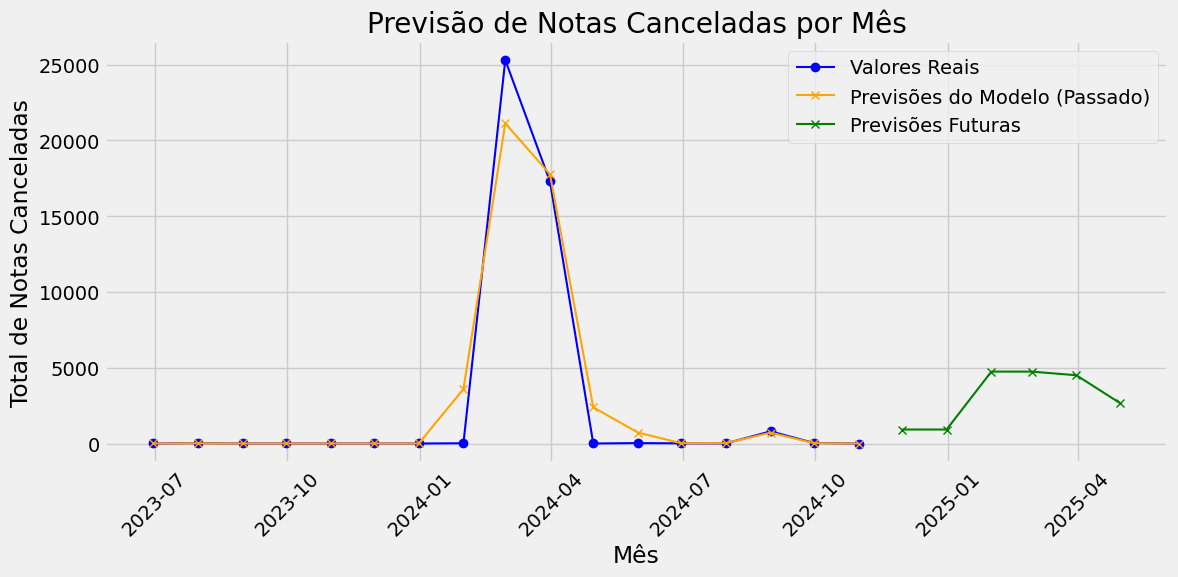

In [63]:
# Gráfico das previsões de cancelamentos por mês
plt.figure(figsize=(12, 6))
# Valores Reais
plt.plot(monthly_cancellations['created_at'], monthly_cancellations['total_canceladas'], marker='o', color='blue', label='Valores Reais')
# Previsões Passadas
plt.plot(monthly_cancellations['created_at'], model.predict(X), marker='x', color='orange', label='Previsões do Modelo (Passado)')
# Previsões Futuras
plt.plot(future_months, y_future_pred, marker='x', color='green', label='Previsões Futuras')
plt.title('Previsão de Notas Canceladas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Notas Canceladas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
